# Data Compression example with autoencoders

We're going to perform the same task as the PCA demo but with an autoencoder parameterized by a neural network

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline

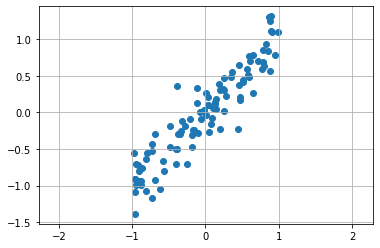

In [15]:
def create_dummy_data():
    # create a dummy dataset by sampling x uniformly from [-1, 1] and y = x + noise
    x = np.random.uniform(-1, 1, 100)
    y = x + np.random.normal(0, 0.25, 100)
    return x, y

# plot the dummy data set

x, y = create_dummy_data()
plt.scatter(x, y)
plt.axis('equal')
plt.grid()
plt.show()

# concatenenate the x and y vectors into a n by 2 matrix
X = np.vstack((x, y)).T

# remove the mean of each feature
X = X - np.mean(X, axis=0)

99 0.017062993720173836
199 0.0029788005631417036
299 0.0015666370745748281
399 0.0009099467424675822
499 0.000664602848701179
599 0.0006040454609319568
699 0.0004609246097970754
799 0.0004123318940401077
899 0.00036875149817205966
999 0.0003422611625865102


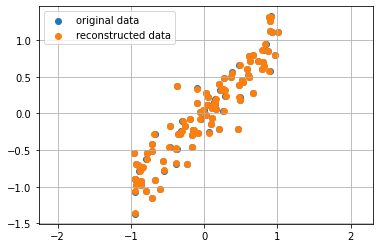

In [23]:
# create an autoencoder model for 2D data using a neural network

class SimpleAutoEncoder(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(2, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 2)
            )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 2)
            )

    def forward(self, x):
        z = self.encoder(x)
        y = self.decoder(z)
        return y, z

model = SimpleAutoEncoder()
# create a loss function
loss_fn = torch.nn.MSELoss()

# create an optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train the model
for t in range(1000):
    # forward pass: compute predicted y by passing x to the model.
    x_tensor = torch.from_numpy(X).float()
    y_tensor = torch.from_numpy(X).float()
    y_pred, z_code = model(x_tensor)

    # compute and print loss.
    loss = loss_fn(y_pred, y_tensor) + 0.01 * torch.mean(z_code ** 2)
    if t % 100 == 99:
        print(t, loss.item())

    # zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
# plot the original data and the reconstructed data
x_tensor = torch.from_numpy(X).float()
y_pred, z_pred = model(x_tensor)
y_pred = y_pred.detach().numpy()
plt.scatter(X[:, 0], X[:, 1], label='original data')
plt.scatter(y_pred[:, 0], y_pred[:, 1], label='reconstructed data')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

Let's visualize the latent space:

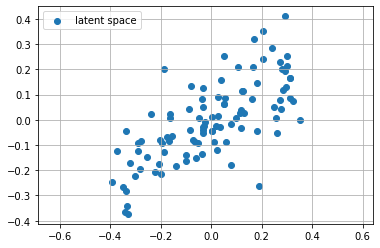

In [24]:
y_pred, z_pred = model(x_tensor)
z_pred_np = z_pred.detach().numpy()

plt.scatter(z_pred_np[:, 0], z_pred_np[:, 1], label='latent space')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

Let's move to the slightly more interesting data-set.

99 0.004836303181946278
199 0.0011901718098670244
299 0.0006400988204404712
399 0.00045801798114553094
499 0.0003761198022402823
599 0.00032315924181602895
699 0.0002746499958448112
799 0.00024926025071181357
899 0.00022080425696913153
999 0.0002090671769110486


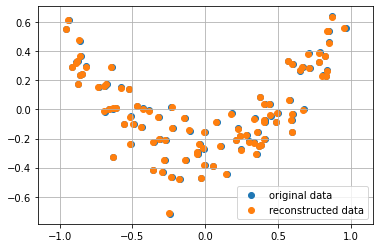

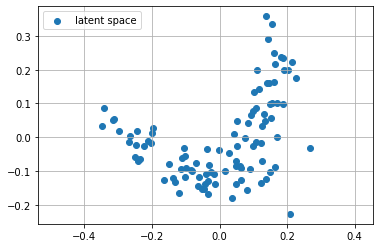

In [30]:
# generate a new dataset using a second order polynomial
def create_polynomial_data():
    x = np.random.uniform(-1, 1, 100)
    y = x**2 + np.random.normal(0, 0.15, 100)
    return x, y
x, y = create_polynomial_data()

# concatenenate the x and y vectors into a n by 2 matrix
X = np.vstack((x, y)).T

# remove the mean of each feature
X = X - np.mean(X, axis=0)

model = SimpleAutoEncoder()
# create a loss function
loss_fn = torch.nn.MSELoss()

# create an optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train the model
for t in range(1000):
    # forward pass: compute predicted y by passing x to the model.
    x_tensor = torch.from_numpy(X).float()
    y_tensor = torch.from_numpy(X).float()
    y_pred, z_code = model(x_tensor)

    # compute and print loss.
    loss = loss_fn(y_pred, y_tensor) + 0.01 * torch.mean(z_code ** 2)
    if t % 100 == 99:
        print(t, loss.item())

    # zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
# plot the original data and the reconstructed data
x_tensor = torch.from_numpy(X).float()
y_pred, z_pred = model(x_tensor)
y_pred = y_pred.detach().numpy()
z_pred_np = z_pred.detach().numpy()

plt.scatter(X[:, 0], X[:, 1], label='original data')
plt.scatter(y_pred[:, 0], y_pred[:, 1], label='reconstructed data')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

plt.scatter(z_pred_np[:, 0], z_pred_np[:, 1], label='latent space')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()